# Getting Started: Importing, Preprocessing, DTMs and CHMs
This notebook will explain how to load and run some of the basic functions to import and process data, create a digital terrain model, a canopy height model, and visualize and export results. Code snippets for more functions can be found in the calculate-forest-metrics notebook, and in the documentation. 

The example dataset is a one-square-kilometer tile derived from a 2019 aerial [lidar survey](https://www.fisheries.noaa.gov/inport/item/68082) of the Big Island of Hawaii. The data is captured over a dry forest and has a nominal pulse spacing of 0.35 meters. The data has been [preprocessed](https://zenodo.org/records/13151991) to classify ground and vegetation points.

First we will load the `pyforestscan` functions that will be used.

In [1]:
from pyforestscan.handlers import read_lidar, create_geotiff
from pyforestscan.visualize import plot_metric
from pyforestscan.filters import remove_outliers_and_clean, classify_ground_points, filter_select_ground
from pyforestscan.calculate import generate_dtm, calculate_chm

### Importing and Preprocessing the Data
We will create a digital terrain model (DTM). We will begin by importing and cleaning the data. For this example, we will act as if the data has not been preprocessed to classify ground. 

We will read the lidar data:

In [2]:
file_path = "../example_data/20191210_5QKB020880.laz"
arrays = read_lidar(file_path, "EPSG:32605")

Now that the data has been loaded, we can clean the data by removing outliers and classifying ground points. 

In [3]:
cleaned_arrays = remove_outliers_and_clean(arrays, mean_k=8, multiplier=3.0)
classified_arrays = classify_ground_points(cleaned_arrays)

### Creating a DTM
To create a DTM, we will begin by extracting only the ground points. Then we can use those ground points to generate the DTM.

In [4]:
ground_points = filter_select_ground(classified_arrays)
dtm, extent = generate_dtm(ground_points, resolution=10.0)

The DTM can be exported as a geotiff which can then be opened in a GIS for further analysis. 

In [5]:
create_geotiff(dtm, "../example_data/20191210_5QKB020880_DS05_dtm.tif", "EPSG:32605", extent)

We can also visualize this DTM using the `plot_metric` function. 

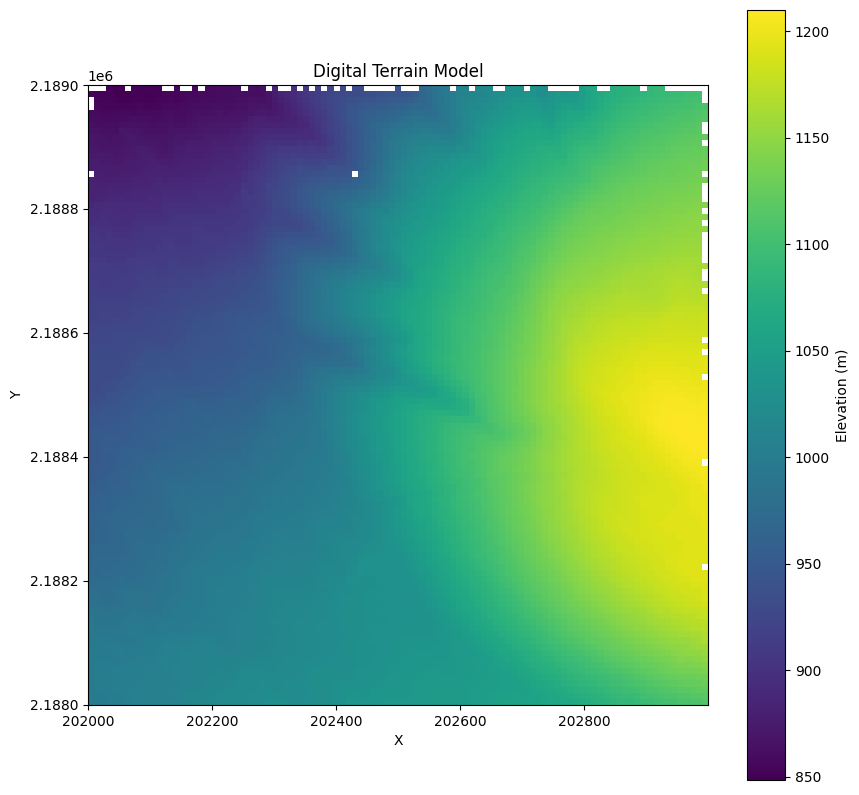

In [6]:
plot_metric('Digital Terrain Model', dtm, extent, metric_name='Elevation (m)',cmap='viridis', fig_size=None)

### Creating a CHM
Next we will create a canopy height model (CHM) from a point cloud array. This array must have a HeightAboveGround dimension defined. This can be added easily when importing the data by setting `hag=True`. In addition to your point cloud array, you must also define the resolution. The resolution must be given as a tuple with the format `(x_res, y_res, z_res)` where `x_res`, `y_res`, and `z_res` are the resolutions along the x, y, and z axes. `calculate_chm` will return the canopy height model along with its extent. 

In [7]:
arrays = read_lidar(file_path, "EPSG:32605", hag=True)

In [8]:
chm, extent = calculate_chm(arrays[0], (1,1,1))

Ploting and export can be accomplished the same way as DTMs. 

In [9]:
create_geotiff(chm, "/Users/iosefa/repos/obia/docs/example_data/chm037.tif", "EPSG:32605", extent)

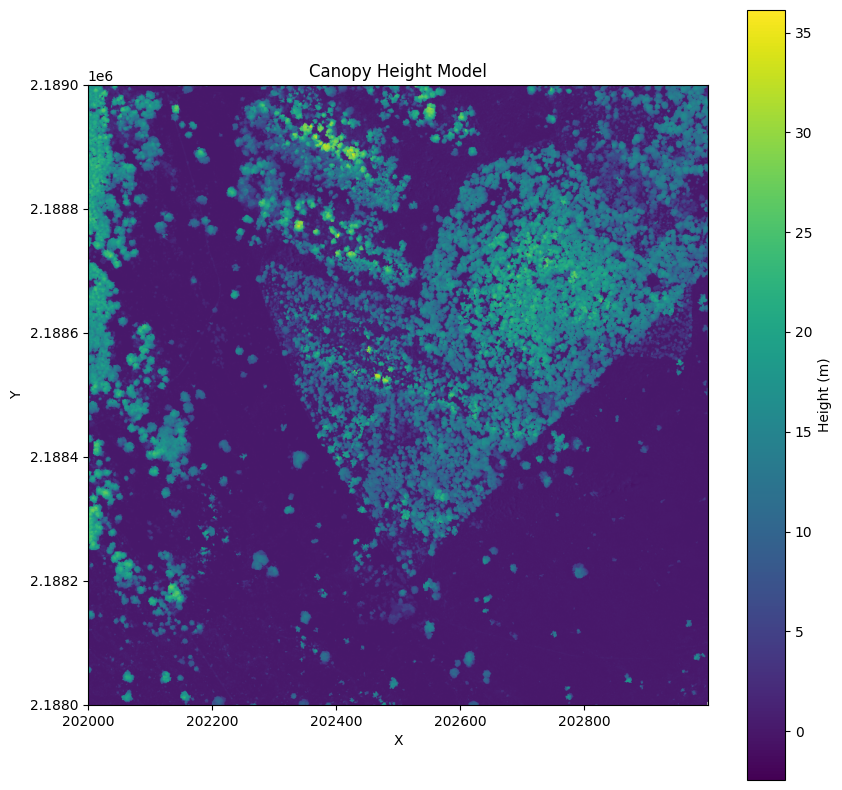

In [10]:
plot_metric("Canopy Height Model", chm, extent, metric_name='Height (m)', cmap='viridis', fig_size=None)